In [70]:
#Importing python packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import configparser
from sklearn.linear_model import LinearRegression

In [71]:
config = configparser.RawConfigParser()
config.read('../data/module5Data/mySQLconfig.properties')

['../data/module5Data/mySQLconfig.properties']

In [72]:
connection = mysql.connector.connect(host='localhost',
user=config.get('DatabaseSection', 'database.user'),
password=config.get('DatabaseSection', 'database.password'),
db= config.get('DatabaseSection', 'database.dbname')
)

In [73]:
auto_tables = pd.read_sql_query('SHOW TABLES',connection)
auto_tables

,Tables_in_auto_ads500b
0,mpg


In [74]:
autoDF = pd.read_sql_query('SELECT * FROM mpg', connection)
autoDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11,70,1,plymouth satellite
3,16,8,304,150,3433,12,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27,4,140,86,2790,15.6,82,1,ford mustang gl
388,44,4,97,52,2130,24.6,82,2,vw pickup
389,32,4,135,84,2295,11.6,82,1,dodge rampage
390,28,4,120,79,2625,18.6,82,1,ford ranger


In [75]:
autoDF.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [76]:
autoDF.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [77]:
autoDF.corr()['mpg']

mpg             1.000000
cylinders      -0.776796
displacement   -0.804304
horsepower     -0.777683
weight         -0.831535
model year      0.582750
origin          0.563667
Name: mpg, dtype: float64

<AxesSubplot:xlabel='weight', ylabel='mpg'>

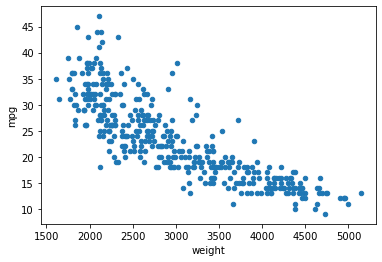

In [78]:
autoDF.plot.scatter(x= 'weight',y= 'mpg')

Dependent = X = mpg  
Independent = Y = weight

In [79]:
X = autoDF['weight'].values.reshape(-1,1)
Y = autoDF['mpg'].values.reshape(-1,1)
linear_regressior = LinearRegression()
linear_regressior.fit(X,Y)
Y_pred = linear_regressior.predict(X)

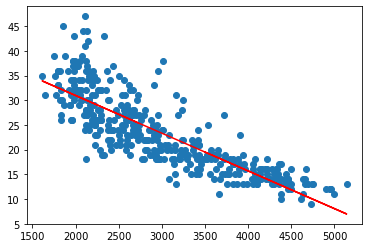

In [80]:
plt.scatter(X,Y)
plt.plot(X,Y_pred, color = 'red')
plt.show()

In [81]:
print(linear_regressior.coef_)
print(linear_regressior.intercept_)

[[-0.00763585]]
[46.22873822]


MPG = -0.0076Weight + 46.23

In [90]:
X = autoDF[['weight','displacement']].values.reshape(-1,len(['weight','displacement']))
y = autoDF['mpg'].values
linear_regressior = LinearRegression()
linear_regressior.fit(X,y)

LinearRegression()

In [91]:
print(linear_regressior.intercept_)
print(linear_regressior.coef_)

43.80518476020051
[-0.00575152 -0.01639391]


MPG = -0.0058*weight-0.0164*displacement + 43.81